<a href="https://colab.research.google.com/github/wooookim/ML-DL/blob/main/%EC%84%9C%EC%9A%B8%EC%8B%9C_%ED%8F%89%EA%B7%A0_%EA%B8%B0%EC%98%A8_%EC%98%88%EC%B8%A1_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data = pd.read_csv('/content/train.csv')
submission = pd.read_csv('/content/sample_submission.csv')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# '일시' 열을 날짜 데이터로 변환
data['일시'] = pd.to_datetime(data['일시'])

data['연도'] = data['일시'].dt.year
data['월'] = data['일시'].dt.month
data['일'] = data['일시'].dt.day

# 월, 일별 중앙값 계산
# 월별 중앙값 계산
monthly_medians = data.groupby('월').median()
daily_medians = data.groupby('일').median()


monthly_means = data.groupby('월').mean()
daily_means = data.groupby('일').mean()

In [ ]:
from datetime import datetime

current_year = datetime.now().year

# 2월 29일에 해당하는 행 선택
selected_rows = data[(data['일시'].dt.month == 2) & (data['일시'].dt.day == 29)]

# 29일에 해당하는 16개 행
# 23011 - 16 = 22995

# 선택한 행의 인덱스를 사용하여 삭제
data = data.drop(selected_rows.index)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22995 entries, 0 to 23010
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일시      22995 non-null  datetime64[ns]
 1   최고기온    22992 non-null  float64       
 2   최저기온    22992 non-null  float64       
 3   일교차     22991 non-null  float64       
 4   강수량     9142 non-null   float64       
 5   평균습도    22995 non-null  float64       
 6   평균풍속    22991 non-null  float64       
 7   일조합     22877 non-null  float64       
 8   일사합     18137 non-null  float64       
 9   일조율     22630 non-null  float64       
 10  평균기온    22995 non-null  float64       
 11  연도      22995 non-null  int64         
 12  월       22995 non-null  int64         
 13  일       22995 non-null  int64         
dtypes: datetime64[ns](1), float64(10), int64(3)
memory usage: 2.6 MB
None


In [ ]:
# 결측값 대체
data.fillna(monthly_medians, inplace=True)

for column in data.columns:
    if data[column].isnull().any():  # 결측값이 있는 경우에만 처리
        data[column+'_중앙값'] = data.apply(lambda row: monthly_medians.loc[row['월'], column], axis=1)
        data[column].fillna(data[column+'_중앙값'], inplace=True)
        data.drop(column+'_중앙값', axis=1, inplace=True)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22995 entries, 0 to 23010
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일시      22995 non-null  datetime64[ns]
 1   최고기온    22995 non-null  float64       
 2   최저기온    22995 non-null  float64       
 3   일교차     22995 non-null  float64       
 4   강수량     22995 non-null  float64       
 5   평균습도    22995 non-null  float64       
 6   평균풍속    22995 non-null  float64       
 7   일조합     22995 non-null  float64       
 8   일사합     22995 non-null  float64       
 9   일조율     22995 non-null  float64       
 10  평균기온    22995 non-null  float64       
 11  연도      22995 non-null  int64         
 12  월       22995 non-null  int64         
 13  일       22995 non-null  int64         
dtypes: datetime64[ns](1), float64(10), int64(3)
memory usage: 3.1 MB
None


In [ ]:
print(monthly_medians)
print(daily_medians)
print(monthly_means)
print(daily_means)

    최고기온   최저기온    일교차   강수량   평균습도  평균풍속  일조합     일사합    일조율  평균기온      연도  \
월                                                                             
1    1.7  -6.40   7.70  0.30  60.50   2.2  6.4   7.890  64.35  -2.6  1991.0   
2    4.4  -3.90   8.30  0.40  58.30   2.4  7.2  10.910  66.10   0.0  1991.0   
3   10.4   1.30   9.20  0.70  58.50   2.6  7.6  14.130  63.40   5.6  1991.0   
4   17.7   7.50  10.35  2.00  56.50   2.7  8.3  17.500  62.80  12.2  1991.0   
5   23.5  13.00  10.60  1.60  61.30   2.4  8.7  19.605  61.55  17.9  1991.0   
6   27.4  18.20   9.30  1.70  69.50   2.2  6.8  17.580  45.90  22.3  1991.0   
7   29.0  22.10   6.90  4.45  79.50   2.1  3.1  12.710  20.05  25.0  1991.0   
8   30.0  22.75   7.40  5.00  76.80   2.0  4.8  13.200  34.70  25.8  1991.0   
9   26.1  17.40   9.10  2.80  69.50   1.8  6.9  13.770  55.60  21.2  1991.0   
10  20.4  10.40  10.10  1.50  64.80   1.8  7.7  11.610  68.50  15.1  1991.0   
11  12.1   3.40   8.50  1.30  63.85   2.0  6.0   7.9

In [ ]:
train = data[['최고기온', '최저기온', '일교차', '강수량', '평균습도', '평균풍속', '일조합', '일사합', '일조율']]

target = data['평균기온']

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
data_after_1970 = data[(data['연도'] >= 1970) & (data['연도'] < 1980)]
data_after_1980 = data[(data['연도'] >= 1980) & (data['연도'] < 1990)]
data_after_1990 = data[(data['연도'] >= 1990) & (data['연도'] < 2000)]
data_after_2000 = data[(data['연도'] >= 2000) & (data['연도'] < 2010)]
data_after_2010 = data[data['연도'] >= 2010]

# print(data_after_1970.info())

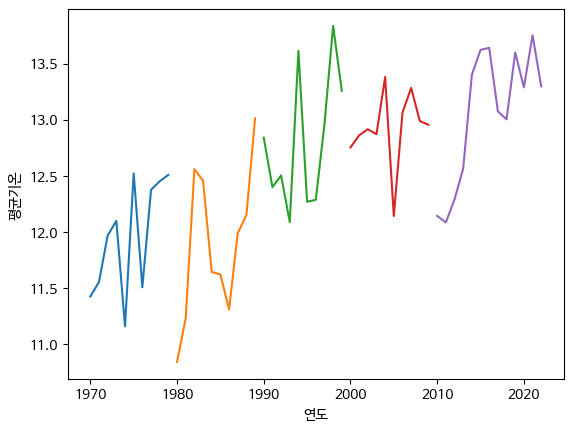

In [ ]:
import matplotlib.pyplot as plt

yearly_70_mean_temperature = data_after_1970.groupby('연도')['평균기온'].mean()
yearly_80_mean_temperature = data_after_1980.groupby('연도')['평균기온'].mean()
yearly_90_mean_temperature = data_after_1990.groupby('연도')['평균기온'].mean()
yearly_00_mean_temperature = data_after_2000.groupby('연도')['평균기온'].mean()
yearly_10_mean_temperature = data_after_2010.groupby('연도')['평균기온'].mean()

# 그래프 그리기
plt.rc('font', family='NanumBarunGothic')
plt.rc('font', family='NanumBarunGothic')
plt.plot(yearly_70_mean_temperature.index, yearly_70_mean_temperature.values)
plt.plot(yearly_80_mean_temperature.index, yearly_80_mean_temperature.values)
plt.plot(yearly_90_mean_temperature.index, yearly_90_mean_temperature.values)
plt.plot(yearly_00_mean_temperature.index, yearly_00_mean_temperature.values)
plt.plot(yearly_10_mean_temperature.index, yearly_10_mean_temperature.values)
plt.xlabel('연도')
plt.ylabel('평균기온')
plt.show()

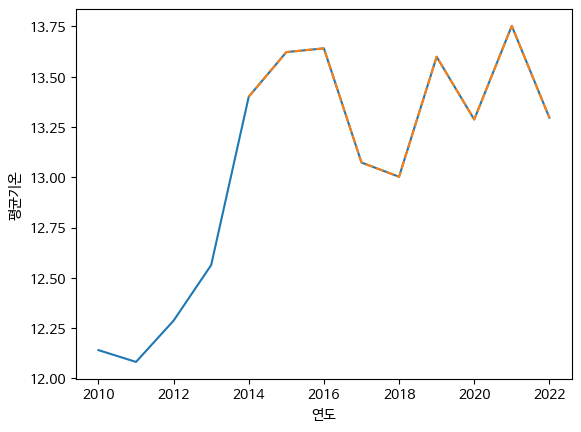

In [ ]:
import matplotlib.pyplot as plt

data_after_2014 = data[data['연도'] >= 2014]
yearly_mean_temperature_after_2014 = data_after_2014.groupby('연도')['평균기온'].mean()

# 그래프 그리기
plt.rc('font', family='NanumBarunGothic')
plt.plot(yearly_10_mean_temperature.index, yearly_10_mean_temperature.values)
plt.plot(yearly_mean_temperature_after_2014.index, yearly_mean_temperature_after_2014.values, label='2014년 이후 데이터', linestyle='--')
plt.xlabel('연도')
plt.ylabel('평균기온')
plt.show()

In [ ]:
train_14 = data_after_2014[['최고기온', '최저기온', '일교차', '강수량', '평균습도', '평균풍속', '일조합', '일사합', '일조율']]
target_14 = data_after_2014['평균기온']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(train_14, target_14)

pred_rf = rf.predict(train_14)

from sklearn.metrics import mean_squared_error
rf_mae = mean_squared_error(target_14, pred_rf)
print(rf_mae)

submission['평균기온'] = pred_rf[:358]
print(submission.head(10))

0.039626992085236075
           일시   평균기온
0  2023-01-01  3.836
1  2023-01-02  1.834
2  2023-01-03  2.568
3  2023-01-04  0.167
4  2023-01-05 -0.721
5  2023-01-06  0.844
6  2023-01-07  2.893
7  2023-01-08 -0.069
8  2023-01-09 -7.821
9  2023-01-10 -4.827


In [ ]:
submission.to_csv("DEAGYUL_14_submission.csv", index=False)

In [ ]:
# 결측값 대체
data.fillna(monthly_means, inplace=True)

for column in data.columns:
    if data[column].isnull().any():  # 결측값이 있는 경우에만 처리
        data[column+'_평균'] = data.apply(lambda row: monthly_means.loc[row['월'], column], axis=1)
        data[column].fillna(data[column+'_평균'], inplace=True)
        data.drop(column+'_평균', axis=1, inplace=True)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22995 entries, 0 to 23010
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일시      22995 non-null  datetime64[ns]
 1   최고기온    22995 non-null  float64       
 2   최저기온    22995 non-null  float64       
 3   일교차     22995 non-null  float64       
 4   강수량     22995 non-null  float64       
 5   평균습도    22995 non-null  float64       
 6   평균풍속    22995 non-null  float64       
 7   일조합     22995 non-null  float64       
 8   일사합     22995 non-null  float64       
 9   일조율     22995 non-null  float64       
 10  평균기온    22995 non-null  float64       
 11  연도      22995 non-null  int64         
 12  월       22995 non-null  int64         
 13  일       22995 non-null  int64         
dtypes: datetime64[ns](1), float64(10), int64(3)
memory usage: 3.1 MB
None
